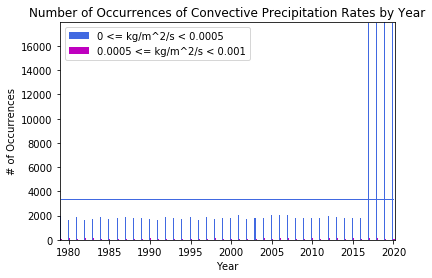

The straight blue line represents the mean number of occurances of very low precipitation rates.


In [7]:
import os
import matplotlib.pylab as plt
from matplotlib import cm
import matplotlib.image as mpimg
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset, glob

directory = "C:/Users/kwjan/Downloads/ConvectivePre"
conv_all = np.zeros((42, 94, 192))
lat_all = np.zeros((42, 94))
lon_all = np.zeros((42, 192))
i = 0

for file in os.listdir(directory):
    air2m = Dataset('C:/Users/kwjan/Downloads/ConvectivePre/' + str(file))
    conv = air2m.variables['cprat'][0, :, :].reshape(94, 192)
    lat = air2m.variables['lat'][:]
    lon = air2m.variables['lon'][:]
    conv_all[i, :, :] = conv
    lat_all[i, :] = lat
    lon_all[i, :] = lon
    i += 1

conv_count = np.zeros((42, 5))
for i in range(42):
    conv_count[i, :] = [sum(sum(np.logical_and(conv_all[i, :, :] > 0, conv_all[i, :, :] < 0.0005))),
                        sum(sum(np.logical_and(conv_all[i, :, :] >= 0.0005, conv_all[i, :, :] < 0.001))),
                        sum(sum(np.logical_and(conv_all[i, :, :] >= 0.001, conv_all[i, :, :] < 0.0015))),
                        sum(sum(np.logical_and(conv_all[i, :, :] >= 0.0015, conv_all[i, :, :] < 0.002))),
                        sum(sum(conv_all[i, :, :] >= 0.002))]
years = np.arange(1979, 2021)
ax = plt.subplot(111)
w = 0.125
ax.bar(years - 0.5*w, conv_count[:, 0], width=w, color='royalblue', align='center', label='0 <= kg/m^2/s < 0.0005')
ax.bar(years + 0.5*w, conv_count[:, 1], width=w, color='m', align='center', label='0.0005 <= kg/m^2/s < 0.001')
ax.autoscale(tight=True)
plt.legend(loc='upper left')
verylowmean = np.mean(conv_count[:, 0])
lowmean = np.mean(conv_count[:, 1])
medmean = np.mean(conv_count[:, 2])
highmean = np.mean(conv_count[:, 3])
veryhighmean = np.mean(conv_count[:, 4])
plt.plot(years, np.full((42,), verylowmean), color='royalblue', linewidth=1)
plt.xlabel('Year')
plt.ylabel('# of Occurrences')
plt.title('Number of Occurrences of Convective Precipitation Rates by Year')
plt.savefig('ConvectivePrecipitationWorld.jpeg', quality=95, dpi=720, orientation='landscape')
plt.show()

print('The straight blue line represents the mean number of occurances of very low precipitation rates.')

In [8]:
verylowabove = years[conv_count[:, 0] > verylowmean]
lowabove = years[conv_count[:, 1] > lowmean]
medabove = years[conv_count[:, 2] > medmean]
highabove = years[conv_count[:, 3] > highmean]
veryhighabove = years[conv_count[:, 4] > veryhighmean]

print(str(sum(verylowabove >= 0)) + ' qualifying years, ', str(sum(verylowabove >= 1999)) + ' years past 1999, ',
      str(round(sum(verylowabove >= 1999) / sum(verylowabove >= 0) * 100, 1)) + '% past 1999 out of qualifying years, ',
      str(round(sum(verylowabove >= 1999) / 42 * 100, 1)) + '% total')
print(str(sum(lowabove >= 0)) + ' qualifying years, ', str(sum(lowabove >= 1999)) + ' years past 1999, ',
      str(round(sum(lowabove >= 1999) / sum(lowabove >= 0) * 100, 1)) + '% past 1999 out of qualifying years, ',
      str(round(sum(lowabove >= 1999) / 42 * 100, 1)) + '% total')
print(str(sum(medabove >= 0)) + ' qualifying years, ', str(sum(medabove >= 1999)) + ' years past 1999, ',
      str(round(sum(medabove >= 1999) / sum(medabove >= 0) * 100, 1)) + '% past 1999 out of qualifying years, ',
      str(round(sum(medabove >= 1999) / 42 * 100, 1)) + '% total')
print(str(sum(highabove >= 0)) + ' qualifying years, ', str(sum(highabove >= 1999)) + ' years past 1999, ',
      str(round(sum(highabove >= 1999) / sum(highabove >= 0) * 100, 1)) + '% past 1999 out of qualifying years, ',
      str(round(sum(highabove >= 1999) / 42 * 100, 1)) + '% total')
print(str(sum(veryhighabove >= 0)) + ' qualifying years, ', str(sum(veryhighabove >= 1999)) + ' years past 1999, ',
      str(round(sum(veryhighabove >= 1999) / sum(veryhighabove >= 0) * 100, 1)) + '% past 1999 out of qualifying years, ',
      str(round(sum(veryhighabove >= 1999) / 42 * 100, 1)) + '% total')

print('\nThe first row describes very low precip. rates represented by the blue lines in the graph above.\nThe second is the medium precip. rates corresponding to the magenta bars.\nThe third, fourth, and fifth rows represent medium, high, and very high precip. rates.\nThe number of occurances for these rates were so small that they do not show up on the above graph.\nTo determine "qualifying years", I filtered for years that have a greater number of occurances of a certain precip. rate range than the mean number of occurances. ')

print('\nVery Low = 0 <= kg/m^2/s < 0.0005')
print('Low = 0.0005 <= kg/m^2/s < 0.001')
print('Medium = 0.001 <= kg/m^2/s < 0.0015')
print('High = 0.0015 <= kg/m^2/s < 0.002')
print('Very High = kg/m^2/s >= 0.002')

print('\nIt can be observed that in the last 21 years, there has been an increase in almost all ranges of convective precipitation\nrates.')


4 qualifying years,  4 years past 1999,  100.0% past 1999 out of qualifying years,  9.5% total
20 qualifying years,  12 years past 1999,  60.0% past 1999 out of qualifying years,  28.6% total
17 qualifying years,  7 years past 1999,  41.2% past 1999 out of qualifying years,  16.7% total
10 qualifying years,  10 years past 1999,  100.0% past 1999 out of qualifying years,  23.8% total
6 qualifying years,  6 years past 1999,  100.0% past 1999 out of qualifying years,  14.3% total

The first row describes very low precip. rates represented by the blue lines in the graph above.
The second is the medium precip. rates corresponding to the magenta bars.
The third, fourth, and fifth rows represent medium, high, and very high precip. rates.
The number of occurances for these rates were so small that they do not show up on the above graph.
To determine "qualifying years", I filtered for years that have a greater number of occurances of a certain precip. rate range than the mean number of occuranc

In [9]:
Year = 1979
for i in range(42):
    plt.figure(figsize=(10, 5))
    txtstring = "Convective Precipitation, " + str(Year + i) + "\n"
    ax = plt.axes(projection=ccrs.Mercator())
    ax.coastlines(resolution='50m')
    ax.add_feature(cfeature.GSHHSFeature(levels=[1], scale='coarse', facecolor="grey"))
    image = ax.contourf(lon_all[i, :], lat_all[i, :], conv_all[i, :, :], transform=ccrs.PlateCarree(),
                        levels=np.linspace(0, 0.0025, 51), extend='both')
    cb = plt.colorbar(image, orientation='horizontal', pad=0.08, shrink=0.65)
    cb.ax.tick_params(labelsize=10)
    cb.set_label('kg/m^2/s', size=18)
    gl = ax.gridlines(draw_labels=True)
    plt.title(txtstring)
    plt.savefig('C:/Users/kwjan/Downloads/ConvectivePics/' + str(Year + i) + '.png')
    plt.close()

import cv2

img_array = []
for filename in glob('C:/Users/kwjan/Downloads/ConvectivePics/*.png'):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width, height)
    img_array.append(img)

out = cv2.VideoWriter('ConvectivePrecipitationWorld.avi', cv2.VideoWriter_fourcc(*'DIVX'), 2.5, size)

for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

print('Creating the .avi file')


Creating the .avi file


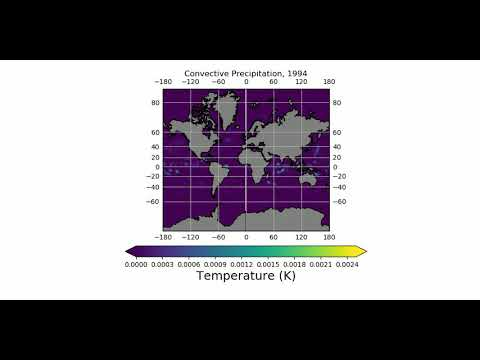

In [10]:
from IPython.display import YouTubeVideo

YouTubeVideo('PkjNKBtXrdg', width=700, height=700)